<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>

# Vector Representations
## *Data Science Unit 4 Sprint 2 Assignment 2*

In [24]:
'''Base stuff'''
import os
import re

import string

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import spacy

from collections import Counter

''' Gensim Stuff '''
import gensim
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from nltk.stem import SnowballStemmer

## 1) *Optional:* Scrape 100 Job Listings that contain the title "Data Scientist" from indeed.com

At a minimum your final dataframe of job listings should contain
- Job Title
- Job Description

If you choose to not to scrape the data, there is a CSV with outdated data in the directory. Remeber, if you scrape Indeed, you're helping yourself find a job. ;)

In [25]:
##### Your Code Here #####
df = pd.read_csv('data/job_listings.csv')
df.head()

,Unnamed: 0,description,title
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist


In [26]:
''' Cleaning text and preparing for NLP '''
STOPWORDS = set(STOPWORDS).union(set(['the', 'aa', 'aaa', 'aaaaaa' ]))

def tokenize(text): 
    return [token for token in simple_preprocess(text) if token not in STOPWORDS and len(token) >=3]

''' Throwing in some regex cleaning just for good measure '''
def clean(text):
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r"!", " ! ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ^ ", text)
    text = re.sub(r"\+", " + ", text)
    text = re.sub(r"\-", " - ", text)
    text = re.sub(r"\=", " = ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    text = text.replace('\n', '')
    
    text = text.split()
    stemmer = SnowballStemmer('english')
    stemmed_words = [stemmer.stem(word) for word in text]
    text = " ".join(stemmed_words)

    return text

## 2) Use Spacy to tokenize / clean the listings 

In [27]:
df['tokens'] = df['description'].apply(tokenize, clean)
df.head()

,Unnamed: 0,description,title,tokens
0,0,"b""<div><div>Job Requirements:</div><ul><li><p>...",Data scientist,"[div, div, job, requirements, div, nconceptual..."
1,1,b'<div>Job Description<br/>\n<br/>\n<p>As a Da...,Data Scientist I,"[div, job, description, data, scientist, help,..."
2,2,b'<div><p>As a Data Scientist you will be work...,Data Scientist - Entry Level,"[div, data, scientist, working, consulting, bu..."
3,3,"b'<div class=""jobsearch-JobMetadataHeader icl-...",Data Scientist,"[div, class, jobsearch, icl, div, class, jobse..."
4,4,b'<ul><li>Location: USA \xe2\x80\x93 multiple ...,Data Scientist,"[location, usa, multiple, locations, years, an..."


## 3) Use Scikit-Learn's CountVectorizer to get word counts for each listing.

In [29]:
##### Your Code Here #####
vect = CountVectorizer()
text = df['tokens'].astype(str)
vect.fit(text)
dtm = vect.transform(text)

In [33]:
# words and word counts for every job listing.
dtm

,aap,abernathy,abilities,ability,able,abounds,abroad,absence,absolutely,absorbing,...,zenreach,zero,zeus,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,1,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
#checking feature names
feature_names = vect.get_feature_names()
feature_names[25]

'accelerator'

In [32]:
'''Converting sparse matrix into dense matrix and creating dataframe using get_feature_names as column headers'''
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
dtm.head()

,aap,abernathy,abilities,ability,able,abounds,abroad,absence,absolutely,absorbing,...,zenreach,zero,zeus,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 4) Visualize the most common word counts

In [34]:
##### Your Code Here #####
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

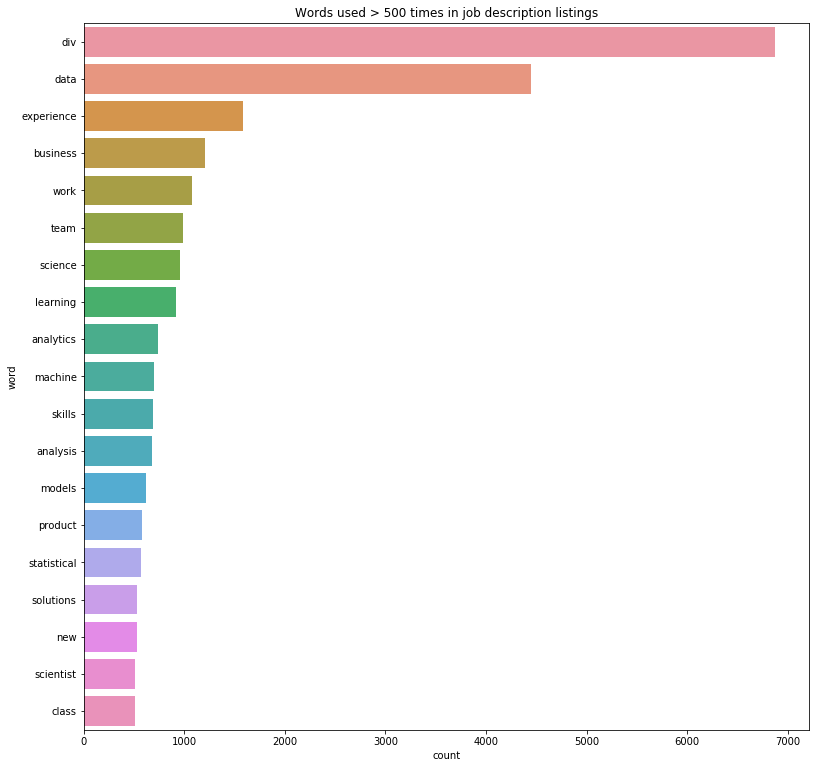

In [40]:
wc = count(df['tokens'])
wc.head()
sns.barplot(x='count', y='word', data=(wc[wc['count'] > 500]))
plt.title('Words used > 500 times in job description listings')
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 13
fig_size[1] = 13

## 5) Use Scikit-Learn's tfidfVectorizer to get a TF-IDF feature matrix

In [46]:
##### Your Code Here #####
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# create list of text documents
text = df['tokens'].astype(str)

# Tokenize and build vocab
vect.fit(text)

# transform text to create feature matrix
dtm = vect.transform(text)

In [47]:
print(dtm)

  (0, 3)	2
  (0, 396)	1
  (0, 428)	1
  (0, 637)	1
  (0, 1169)	1
  (0, 1224)	1
  (0, 1306)	1
  (0, 1770)	1
  (0, 1817)	1
  (0, 1852)	1
  (0, 2100)	18
  (0, 2149)	1
  (0, 2269)	1
  (0, 2589)	2
  (0, 2599)	1
  (0, 2628)	1
  (0, 2752)	1
  (0, 2774)	1
  (0, 2875)	1
  (0, 2968)	1
  (0, 3080)	1
  (0, 3089)	1
  (0, 3223)	2
  (0, 3331)	1
  (0, 3339)	1
  :	:
  (425, 7987)	1
  (425, 8007)	1
  (425, 8039)	1
  (425, 8090)	1
  (425, 8094)	1
  (425, 8125)	1
  (425, 8219)	1
  (425, 8248)	1
  (425, 8282)	1
  (425, 8292)	2
  (425, 8338)	1
  (425, 8346)	1
  (425, 8379)	1
  (425, 8399)	1
  (425, 8427)	1
  (425, 8433)	1
  (425, 8451)	1
  (425, 8495)	1
  (425, 8565)	2
  (425, 8587)	6
  (425, 8592)	1
  (425, 8595)	2
  (425, 8598)	1
  (425, 8631)	2
  (425, 8632)	1


In [48]:
# create pandas dataframe using sparse matrix above and get_feature_names as columns
dtm = pd.DataFrame(dtm.todense(), columns=vect.get_feature_names())
print('TF-IDF Feature Matrix:')
dtm.head()

TF-IDF Feature Matrix:


,aap,abernathy,abilities,ability,able,abounds,abroad,absence,absolutely,absorbing,...,zenreach,zero,zeus,zheng,zillow,zogsports,zones,zoom,zuckerberg,zurich
0,0,0,0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## 6) Create a NearestNeighbor Model. Write the description of your ideal datascience job and query your job listings. 

In [49]:
##### Your Code Here #####
from sklearn.neighbors import NearestNeighbors

#Instantiate NearestNeighbors model
nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')
# Fit NN model to TF-IDF feature matrix
nn.fit(dtm)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=5, p=2, radius=1.0)

In [51]:
ideal_job = ['''
Looking for a data science job where I continue to learn and grow professionally.
Where I can apply machine learning and ai algorithms to address the business question.
I aim to integrate my previous biology, chemistry, and data analysis skills with machine
learning, big data and statistics to engineer solutions to common problems in society
''']

In [52]:
new = vect.transform(ideal_job)
a = nn.kneighbors(new.todense())

In [53]:
a[0:2]

(array([[7.34846923, 7.41619849, 8.30662386, 9.11043358, 9.69535971]]),
 array([[  4, 159, 105, 235, 106]]))

In [58]:
print(df['description'].iloc[106])

b'<div><p>We are looking for a senior level data scientist with 6+ years of full-time experience writing code for large-scale distributed production systems. Tasks include:</p>\n<ul>\n<li>Writing clean, efficient, and scalable deep learning code for production</li>\n<li>Staying current with research in deep learning and image classification</li>\n<li>Architecting solutions that integrate into existing products and tools</li>\n<li>Implementing tools to analyze and improve large data sets of images</li>\n<li>Finding ways to improve existing models to get better performance</li></ul></div><p></p>'


## Stretch Goals

 - Try different visualizations for words and frequencies - what story do you want to tell with the data?
 - Scrape Job Listings for the job title "Data Analyst". How do these differ from Data Scientist Job Listings
 - Try and identify requirements for experience specific technologies that are asked for in the job listings. How are those distributed among the job listings?
 - Use a clustering algorithm to cluster documents by their most important terms. Do the clusters reveal any common themes?
  - **Hint:** K-means might not be the best algorithm for this. Do a little bit of research to see what might be good for this. Also, remember that algorithms that depend on Euclidean distance break down with high dimensional data.
 - Create a labeled dataset - which jobs will you apply for? Train a model to select the jobs you are most likely to apply for. :) 